# IMDB Movie Ratings

## Importing Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 10; HD1913) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.6099.144 Mobile Safari/537.36 EdgA/120.0.2210.64'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1714727599592);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb Top 250 Movies" property="og:title"/><meta content="As rated by regular IMDb voters." p

List of movies are not inside a table but exist as links inside div elements

In [4]:
movie_titles_raw = soup.find_all('a', class_ = 'ipc-title-link-wrapper')

In [5]:
movie_titles = [movie.text.strip() for movie in movie_titles_raw]
movie_titles

['1. The Shawshank Redemption',
 '2. The Godfather',
 '3. The Dark Knight',
 '4. The Godfather: Part II',
 '5. 12 Angry Men',
 "6. Schindler's List",
 '7. The Lord of the Rings: The Return of the King',
 '8. Pulp Fiction',
 '9. The Lord of the Rings: The Fellowship of the Ring',
 '10. The Good, the Bad and the Ugly',
 '11. Forrest Gump',
 '12. The Lord of the Rings: The Two Towers',
 '13. Fight Club',
 '14. Inception',
 '15. Star Wars: Episode V - The Empire Strikes Back',
 '16. The Matrix',
 '17. GoodFellas',
 "18. One Flew Over the Cuckoo's Nest",
 '19. Se7en',
 '20. Interstellar',
 "21. It's a Wonderful Life",
 '22. Dune: Part Two',
 '23. Shichinin no samurai',
 '24. The Silence of the Lambs',
 '25. Saving Private Ryan',
 '26. City of God',
 '27. La vita è bella',
 '28. The Green Mile',
 '29. Terminator 2: Judgment Day',
 '30. Star Wars',
 '31. Back to the Future',
 '32. Sen to Chihiro no kamikakushi',
 '33. The Pianist',
 '34. Parasite',
 '35. Psycho',
 '36. Spider-Man: Across the 

There are items on the end of the list that should not be included on the list. 

In [6]:
#filtering list items 0 to 250
movie_titles = movie_titles[0:250]

In [7]:
movie_titles

['1. The Shawshank Redemption',
 '2. The Godfather',
 '3. The Dark Knight',
 '4. The Godfather: Part II',
 '5. 12 Angry Men',
 "6. Schindler's List",
 '7. The Lord of the Rings: The Return of the King',
 '8. Pulp Fiction',
 '9. The Lord of the Rings: The Fellowship of the Ring',
 '10. The Good, the Bad and the Ugly',
 '11. Forrest Gump',
 '12. The Lord of the Rings: The Two Towers',
 '13. Fight Club',
 '14. Inception',
 '15. Star Wars: Episode V - The Empire Strikes Back',
 '16. The Matrix',
 '17. GoodFellas',
 "18. One Flew Over the Cuckoo's Nest",
 '19. Se7en',
 '20. Interstellar',
 "21. It's a Wonderful Life",
 '22. Dune: Part Two',
 '23. Shichinin no samurai',
 '24. The Silence of the Lambs',
 '25. Saving Private Ryan',
 '26. City of God',
 '27. La vita è bella',
 '28. The Green Mile',
 '29. Terminator 2: Judgment Day',
 '30. Star Wars',
 '31. Back to the Future',
 '32. Sen to Chihiro no kamikakushi',
 '33. The Pianist',
 '34. Parasite',
 '35. Psycho',
 '36. Spider-Man: Across the 

In [8]:
year_len_rating_raw = soup.find_all('span', class_ = 'sc-b189961a-8 kLaxqf cli-title-metadata-item')
year_len_rating_raw

[<span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">1994</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">2h 22m</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">R-18</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">1972</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">2h 55m</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">R-18</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">2008</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">2h 32m</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">PG-13</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">1974</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">3h 22m</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">R-18</span>,
 <span class="sc-b189961a-8 kLaxqf cli-title-metadata-item">1957</span>,
 <span class="sc-b189961a-8 kLaxqf cli-tit

In [9]:
year_len_rating = [info.text.strip() for info in year_len_rating_raw]
year_len_rating

['1994',
 '2h 22m',
 'R-18',
 '1972',
 '2h 55m',
 'R-18',
 '2008',
 '2h 32m',
 'PG-13',
 '1974',
 '3h 22m',
 'R-18',
 '1957',
 '1h 36m',
 'PG-13',
 '1993',
 '3h 15m',
 'R-18',
 '2003',
 '3h 21m',
 'PG-13',
 '1994',
 '2h 34m',
 'R-18',
 '2001',
 '2h 58m',
 'G',
 '1966',
 '2h 41m',
 'R-18',
 '1994',
 '2h 22m',
 'PG-13',
 '2002',
 '2h 59m',
 'G',
 '1999',
 '2h 19m',
 'R-18',
 '2010',
 '2h 28m',
 'PG-13',
 '1980',
 '2h 4m',
 'G',
 '1999',
 '2h 16m',
 'PG-13',
 '1990',
 '2h 25m',
 'R-18',
 '1975',
 '2h 13m',
 'R',
 '1995',
 '2h 7m',
 'R-18',
 '2014',
 '2h 49m',
 'PG-13',
 '1946',
 '2h 10m',
 'G',
 '2024',
 '2h 46m',
 'PG',
 '1954',
 '3h 27m',
 'R-13',
 '1991',
 '1h 58m',
 'R-18',
 '1998',
 '2h 49m',
 'PG-13',
 '2002',
 '2h 10m',
 'R-18',
 '1997',
 '1h 56m',
 '13+',
 '1999',
 '3h 9m',
 'PG-13',
 '1991',
 '2h 17m',
 'R-13',
 '1977',
 '2h 1m',
 'G',
 '1985',
 '1h 56m',
 'G',
 '2001',
 '2h 5m',
 'PG-13',
 '2002',
 '2h 30m',
 'R',
 '2019',
 '2h 12m',
 'R-13',
 '1960',
 '1h 49m',
 'PG-13',
 '2023

In [10]:
list_length = len(year_len_rating)

In [11]:
for i in range(0, 748, 3):
    print(i)



0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
189
192
195
198
201
204
207
210
213
216
219
222
225
228
231
234
237
240
243
246
249
252
255
258
261
264
267
270
273
276
279
282
285
288
291
294
297
300
303
306
309
312
315
318
321
324
327
330
333
336
339
342
345
348
351
354
357
360
363
366
369
372
375
378
381
384
387
390
393
396
399
402
405
408
411
414
417
420
423
426
429
432
435
438
441
444
447
450
453
456
459
462
465
468
471
474
477
480
483
486
489
492
495
498
501
504
507
510
513
516
519
522
525
528
531
534
537
540
543
546
549
552
555
558
561
564
567
570
573
576
579
582
585
588
591
594
597
600
603
606
609
612
615
618
621
624
627
630
633
636
639
642
645
648
651
654
657
660
663
666
669
672
675
678
681
684
687
690
693
696
699
702
705
708
711
714
717
720
723
726
729
732
735
738
741
744
747


In [12]:
#movie year
movie_year = []
for i in range(0, list_length, 3):
    print(i, year_len_rating[i])
    #text = year_len_rating[i]
    #movie_year.append(text)

0 1994
3 1972
6 2008
9 1974
12 1957
15 1993
18 2003
21 1994
24 2001
27 1966
30 1994
33 2002
36 1999
39 2010
42 1980
45 1999
48 1990
51 1975
54 1995
57 2014
60 1946
63 2024
66 1954
69 1991
72 1998
75 2002
78 1997
81 1999
84 1991
87 1977
90 1985
93 2001
96 2002
99 2019
102 1960
105 2023
108 2000
111 1994
114 1994
117 2006
120 1998
123 2014
126 2006
129 1988
132 1962
135 1995
138 1942
141 2011
144 1988
147 1936
150 1954
153 1968
156 1979
159 1931
162 2012
165 1979
168 2000
171 2023
174 1h 38m
177 1h 55m
180 2h 17m
183 1h 50m
186 1h 28m
189 2h 29m
192 1h 57m
195 1h 56m
198 2h 26m
201 2h 5m
204 2h 17m
207 2h 33m
210 2h 44m
213 1h 35m
216 2h 2m
219 2h
222 1h 45m
225 2h 40m
228 1h 21m
231 2h 29m
234 PG
237 R-18
240 R-16
243 R-13
246 R
249 G
252 R-18
255 Not Rated
258 PG-13
261 G
264 R
267 R-18
270 Not Rated
273 PG-13
276 13+
279 R-13
282 R-16
285 R
288 PG-13
291 R-18
294 Not Rated
297 R-13
300 PG-13
303 PG-13
306 R
309 PG
312 PG-13
315 Passed
318 Approved
321 R-18
324 R-18
327 PG-13
330 R-18


In [13]:
alt_year_len_rating_raw = soup.find_all('div', class_ = "sc-b189961a-7 feoqjK cli-title-metadata")

In [14]:
alt_year_len_rating = [data.text.strip() for data in alt_year_len_rating_raw]
alt_year_len_rating

['19942h 22mR-18',
 '19722h 55mR-18',
 '20082h 32mPG-13',
 '19743h 22mR-18',
 '19571h 36mPG-13',
 '19933h 15mR-18',
 '20033h 21mPG-13',
 '19942h 34mR-18',
 '20012h 58mG',
 '19662h 41mR-18',
 '19942h 22mPG-13',
 '20022h 59mG',
 '19992h 19mR-18',
 '20102h 28mPG-13',
 '19802h 4mG',
 '19992h 16mPG-13',
 '19902h 25mR-18',
 '19752h 13mR',
 '19952h 7mR-18',
 '20142h 49mPG-13',
 '19462h 10mG',
 '20242h 46mPG',
 '19543h 27mR-13',
 '19911h 58mR-18',
 '19982h 49mPG-13',
 '20022h 10mR-18',
 '19971h 56m13+',
 '19993h 9mPG-13',
 '19912h 17mR-13',
 '19772h 1mG',
 '19851h 56mG',
 '20012h 5mPG-13',
 '20022h 30mR',
 '20192h 12mR-13',
 '19601h 49mPG-13',
 '20232h 20mPG',
 '20002h 35mPG-13',
 '19941h 28mG',
 '19941h 50mR-18',
 '20062h 31mR-13',
 '19981h 59mR-18',
 '20141h 46mPG-13',
 '20062h 10mR-13',
 '19881h 29mPG-13',
 '19622h 13mR-13',
 '19951h 46mR-18',
 '19421h 42mPG',
 '20111h 52mR',
 '19882h 54mPG',
 '19361h 27mG',
 '19541h 52mPG-13',
 '19682h 46mG',
 '19791h 57mR-18',
 '19311h 27mG',
 '20122h 45m

In [15]:
#converting to pandas series
alt_year_len_rating = pd.Series(alt_year_len_rating)

In [16]:
re.findall('^[0-9]{4}', alt_year_len_rating[0])[0]

'1994'

In [17]:
#extracting year
year = []
for i in alt_year_len_rating:
    year.append(re.findall('^[0-9]{4}', i)[0])
    

In [18]:
year

['1994',
 '1972',
 '2008',
 '1974',
 '1957',
 '1993',
 '2003',
 '1994',
 '2001',
 '1966',
 '1994',
 '2002',
 '1999',
 '2010',
 '1980',
 '1999',
 '1990',
 '1975',
 '1995',
 '2014',
 '1946',
 '2024',
 '1954',
 '1991',
 '1998',
 '2002',
 '1997',
 '1999',
 '1991',
 '1977',
 '1985',
 '2001',
 '2002',
 '2019',
 '1960',
 '2023',
 '2000',
 '1994',
 '1994',
 '2006',
 '1998',
 '2014',
 '2006',
 '1988',
 '1962',
 '1995',
 '1942',
 '2011',
 '1988',
 '1936',
 '1954',
 '1968',
 '1979',
 '1931',
 '2012',
 '1979',
 '2000',
 '2023',
 '2008',
 '1981',
 '2006',
 '1950',
 '1957',
 '2018',
 '2018',
 '1957',
 '1980',
 '1940',
 '1986',
 '2009',
 '2012',
 '1964',
 '1999',
 '2003',
 '2017',
 '1984',
 '1995',
 '1981',
 '2019',
 '1995',
 '2019',
 '1997',
 '1997',
 '2016',
 '1984',
 '1963',
 '2009',
 '1952',
 '2018',
 '2000',
 '1985',
 '2010',
 '1983',
 '2004',
 '2023',
 '2012',
 '1968',
 '1992',
 '1952',
 '1962',
 '1960',
 '1959',
 '2010',
 '1941',
 '1958',
 '1931',
 '1944',
 '1983',
 '1987',
 '2001',
 '1995',
 

In [19]:
re.sub('^[0-9]{4}', '', alt_year_len_rating[0])

'2h 22mR-18'

In [20]:
#extracting hour
hour_min_rating = []
hour_processed = []
for i in alt_year_len_rating:
    hour_min_rating.append(re.sub('^[0-9]{4}', '', i))

for j in hour_min_rating:
    hour_processed.append(re.findall('^[0-9h]{2}', j)[0])


In [21]:
hour_processed

['2h',
 '2h',
 '2h',
 '3h',
 '1h',
 '3h',
 '3h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '3h',
 '1h',
 '2h',
 '2h',
 '1h',
 '3h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '2h',
 '1h',
 '1h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '2h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '1h',
 '2h',
 '1h',
 '2h',
 '3h',
 '2h',
 '2h',
 '2h',
 '2h',
 '1h',
 '3h',
 '2h',
 '2h',
 '1h',
 '2h',
 '1h',
 '2h',
 '1h',
 '2h',
 '1h',
 '3h',
 '1h',
 '2h',
 '1h',
 '2h',
 '3h',
 '2h',
 '2h',
 '2h',
 '1h',
 '2h',
 '1h',
 '1h',
 '2h',
 '1h',
 '2h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '1h',
 '1h',
 '1h',
 '2h',
 '2h',
 '2h',
 '2h',
 '3h',
 '2h',
 '2h',
 '1h',
 '1h',
 '2h',
 '2h',
 '1h',
 '2h',
 '2h',
 '2h',
 '2h',
 '2h',

In [22]:
hour_min_rating

['2h 22mR-18',
 '2h 55mR-18',
 '2h 32mPG-13',
 '3h 22mR-18',
 '1h 36mPG-13',
 '3h 15mR-18',
 '3h 21mPG-13',
 '2h 34mR-18',
 '2h 58mG',
 '2h 41mR-18',
 '2h 22mPG-13',
 '2h 59mG',
 '2h 19mR-18',
 '2h 28mPG-13',
 '2h 4mG',
 '2h 16mPG-13',
 '2h 25mR-18',
 '2h 13mR',
 '2h 7mR-18',
 '2h 49mPG-13',
 '2h 10mG',
 '2h 46mPG',
 '3h 27mR-13',
 '1h 58mR-18',
 '2h 49mPG-13',
 '2h 10mR-18',
 '1h 56m13+',
 '3h 9mPG-13',
 '2h 17mR-13',
 '2h 1mG',
 '1h 56mG',
 '2h 5mPG-13',
 '2h 30mR',
 '2h 12mR-13',
 '1h 49mPG-13',
 '2h 20mPG',
 '2h 35mPG-13',
 '1h 28mG',
 '1h 50mR-18',
 '2h 31mR-13',
 '1h 59mR-18',
 '1h 46mPG-13',
 '2h 10mR-13',
 '1h 29mPG-13',
 '2h 13mR-13',
 '1h 46mR-18',
 '1h 42mPG',
 '1h 52mR',
 '2h 54mPG',
 '1h 27mG',
 '1h 52mPG-13',
 '2h 46mG',
 '1h 57mR-18',
 '1h 27mG',
 '2h 45mR-16',
 '2h 27mR-18',
 '1h 53mR',
 '2h 27m',
 '1h 38mG',
 '1h 55mG',
 '2h 17mR',
 '1h 50mPG-13',
 '1h 28mPG-13',
 '2h 29mPG-13',
 '1h 57mPG-13',
 '1h 56mApproved',
 '2h 26mX',
 '2h 5mG',
 '2h 17mR-18',
 '2h 33mR-18',
 '2

In [23]:
#extracting minutes
min_rating = []
min_processed = []
for i in hour_min_rating:
    min_rating.append(re.sub('^[0-9h]{2}', '', i))

min_rating = [s.strip() for s in min_rating]

for k in min_rating:
    min_exist = re.search('\\d*m', k)

    if min_exist:
        min_processed.append(re.findall('\\d*m', k)[0])
    else:
        min_processed.append("0m")

In [24]:
min_processed

['22m',
 '55m',
 '32m',
 '22m',
 '36m',
 '15m',
 '21m',
 '34m',
 '58m',
 '41m',
 '22m',
 '59m',
 '19m',
 '28m',
 '4m',
 '16m',
 '25m',
 '13m',
 '7m',
 '49m',
 '10m',
 '46m',
 '27m',
 '58m',
 '49m',
 '10m',
 '56m',
 '9m',
 '17m',
 '1m',
 '56m',
 '5m',
 '30m',
 '12m',
 '49m',
 '20m',
 '35m',
 '28m',
 '50m',
 '31m',
 '59m',
 '46m',
 '10m',
 '29m',
 '13m',
 '46m',
 '42m',
 '52m',
 '54m',
 '27m',
 '52m',
 '46m',
 '57m',
 '27m',
 '45m',
 '27m',
 '53m',
 '27m',
 '38m',
 '55m',
 '17m',
 '50m',
 '28m',
 '29m',
 '57m',
 '56m',
 '26m',
 '5m',
 '17m',
 '33m',
 '44m',
 '35m',
 '2m',
 '0m',
 '45m',
 '40m',
 '21m',
 '29m',
 '1m',
 '58m',
 '2m',
 '14m',
 '6m',
 '46m',
 '49m',
 '23m',
 '50m',
 '43m',
 '6m',
 '42m',
 '22m',
 '43m',
 '11m',
 '48m',
 '0m',
 '55m',
 '29m',
 '39m',
 '23m',
 '38m',
 '5m',
 '16m',
 '11m',
 '59m',
 '8m',
 '57m',
 '47m',
 '50m',
 '56m',
 '2m',
 '50m',
 '16m',
 '36m',
 '9m',
 '9m',
 '3m',
 '7m',
 '12m',
 '33m',
 '42m',
 '44m',
 '40m',
 '18m',
 '59m',
 '29m',
 '54m',
 '36m',
 '41

In [25]:
min_rating

['22mR-18',
 '55mR-18',
 '32mPG-13',
 '22mR-18',
 '36mPG-13',
 '15mR-18',
 '21mPG-13',
 '34mR-18',
 '58mG',
 '41mR-18',
 '22mPG-13',
 '59mG',
 '19mR-18',
 '28mPG-13',
 '4mG',
 '16mPG-13',
 '25mR-18',
 '13mR',
 '7mR-18',
 '49mPG-13',
 '10mG',
 '46mPG',
 '27mR-13',
 '58mR-18',
 '49mPG-13',
 '10mR-18',
 '56m13+',
 '9mPG-13',
 '17mR-13',
 '1mG',
 '56mG',
 '5mPG-13',
 '30mR',
 '12mR-13',
 '49mPG-13',
 '20mPG',
 '35mPG-13',
 '28mG',
 '50mR-18',
 '31mR-13',
 '59mR-18',
 '46mPG-13',
 '10mR-13',
 '29mPG-13',
 '13mR-13',
 '46mR-18',
 '42mPG',
 '52mR',
 '54mPG',
 '27mG',
 '52mPG-13',
 '46mG',
 '57mR-18',
 '27mG',
 '45mR-16',
 '27mR-18',
 '53mR',
 '27m',
 '38mG',
 '55mG',
 '17mR',
 '50mPG-13',
 '28mPG-13',
 '29mPG-13',
 '57mPG-13',
 '56mApproved',
 '26mX',
 '5mG',
 '17mR-18',
 '33mR-18',
 '44mPG-13',
 '35mPG',
 '2mR-18',
 'R-18',
 '45mG',
 '40mPG',
 '21mG',
 '29m',
 '1mPG',
 '58mR-18',
 '2mR-16',
 '14mR-13',
 '6mR',
 '46mG',
 '49mR-18',
 '23mNot Rated',
 '50mPG-13',
 '43mG',
 '6mR',
 '42mR-18',
 '

In [26]:
#extract rating
rating_processed = []
for i in min_rating:
    min_exist = re.search('\\d*m', i)
    if min_exist:
        rating_processed.append(re.sub('\\d*m', '',i))
    else:
        rating_processed.append(i)

In [27]:
rating_processed

['R-18',
 'R-18',
 'PG-13',
 'R-18',
 'PG-13',
 'R-18',
 'PG-13',
 'R-18',
 'G',
 'R-18',
 'PG-13',
 'G',
 'R-18',
 'PG-13',
 'G',
 'PG-13',
 'R-18',
 'R',
 'R-18',
 'PG-13',
 'G',
 'PG',
 'R-13',
 'R-18',
 'PG-13',
 'R-18',
 '13+',
 'PG-13',
 'R-13',
 'G',
 'G',
 'PG-13',
 'R',
 'R-13',
 'PG-13',
 'PG',
 'PG-13',
 'G',
 'R-18',
 'R-13',
 'R-18',
 'PG-13',
 'R-13',
 'PG-13',
 'R-13',
 'R-18',
 'PG',
 'R',
 'PG',
 'G',
 'PG-13',
 'G',
 'R-18',
 'G',
 'R-16',
 'R-18',
 'R',
 '',
 'G',
 'G',
 'R',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'Approved',
 'X',
 'G',
 'R-18',
 'R-18',
 'PG-13',
 'PG',
 'R-18',
 'R-18',
 'G',
 'PG',
 'G',
 '',
 'PG',
 'R-18',
 'R-16',
 'R-13',
 'R',
 'G',
 'R-18',
 'Not Rated',
 'PG-13',
 'G',
 'R',
 'R-18',
 'Not Rated',
 'PG-13',
 '13+',
 'R-13',
 'R-16',
 'R',
 'PG-13',
 'R-18',
 'Not Rated',
 'R-13',
 'PG-13',
 'PG-13',
 'R',
 'PG',
 'PG-13',
 'Passed',
 'Approved',
 'R-18',
 'R-18',
 'PG-13',
 'R-18',
 'R-18',
 'G',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 

In [28]:
#checking the size of each list
print("Movies: ", len(movie_titles))
print("Year:", len(year))
print("Hour: ", len(hour_processed))
print("Minute: ", len(min_processed))
print("Rating: ", len(rating_processed))

Movies:  250
Year: 250
Hour:  250
Minute:  250
Rating:  250


All list are of the same length

In [29]:
soup.find_all('span', class_ = 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating')[0].text.strip()

'9.3\xa0(2.9M)'

In [30]:
#extracting score and number of raters
score_numRater_raw = soup.find_all('span', class_ = 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating')
score_numRater_raw

[<span aria-label="IMDb rating: 9.3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg>9.3<span class="ipc-rating-star--voteCount"> (<!-- -->2.9M<!-- -->)</span></span>,
 <span aria-label="IMDb rating: 9.2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="2

In [31]:
#stripping
score_numRater = [items.text.strip() for items in score_numRater_raw]
score_numRater

['9.3\xa0(2.9M)',
 '9.2\xa0(2M)',
 '9.0\xa0(2.9M)',
 '9.0\xa0(1.4M)',
 '9.0\xa0(866K)',
 '9.0\xa0(1.5M)',
 '9.0\xa0(2M)',
 '8.9\xa0(2.2M)',
 '8.9\xa0(2M)',
 '8.8\xa0(812K)',
 '8.8\xa0(2.3M)',
 '8.8\xa0(1.8M)',
 '8.8\xa0(2.3M)',
 '8.8\xa0(2.6M)',
 '8.7\xa0(1.4M)',
 '8.7\xa0(2.1M)',
 '8.7\xa0(1.3M)',
 '8.7\xa0(1.1M)',
 '8.6\xa0(1.8M)',
 '8.7\xa0(2.1M)',
 '8.6\xa0(499K)',
 '8.7\xa0(382K)',
 '8.6\xa0(367K)',
 '8.6\xa0(1.5M)',
 '8.6\xa0(1.5M)',
 '8.6\xa0(801K)',
 '8.6\xa0(743K)',
 '8.6\xa0(1.4M)',
 '8.6\xa0(1.2M)',
 '8.6\xa0(1.5M)',
 '8.5\xa0(1.3M)',
 '8.6\xa0(850K)',
 '8.5\xa0(913K)',
 '8.5\xa0(960K)',
 '8.5\xa0(719K)',
 '8.6\xa0(370K)',
 '8.5\xa0(1.6M)',
 '8.5\xa0(1.1M)',
 '8.5\xa0(1.2M)',
 '8.5\xa0(1.4M)',
 '8.5\xa0(1.2M)',
 '8.5\xa0(990K)',
 '8.5\xa0(1.4M)',
 '8.5\xa0(311K)',
 '8.6\xa0(69K)',
 '8.5\xa0(1.1M)',
 '8.5\xa0(606K)',
 '8.5\xa0(930K)',
 '8.5\xa0(283K)',
 '8.5\xa0(260K)',
 '8.5\xa0(522K)',
 '8.5\xa0(349K)',
 '8.5\xa0(951K)',
 '8.5\xa0(196K)',
 '8.5\xa0(1.7M)',
 '8.4\xa0(711K)',

In [32]:
#replacing '\xa0' with ' '
re.sub('\xa0', ' ', score_numRater[0])


'9.3 (2.9M)'

In [33]:
score_numRater[0]

'9.3\xa0(2.9M)'

In [34]:
score_numRater_processed = []
for i in score_numRater:
    score_numRater_processed.append(re.sub('\xa0', ' ', i))

In [35]:
#converting to pandas series for easy splitting
score_numRater_processed = pd.Series(score_numRater_processed)

In [36]:
len(score_numRater_processed)

250

In [37]:
#separating socre and numrater
score = []
numRater = []
length_score_numRater = len(score_numRater_processed)
for x in range(0, length_score_numRater):
    score.append(score_numRater_processed.str.split(' ')[x][0])
    
for y in range(0, length_score_numRater):
    numRater.append(score_numRater_processed.str.split(' ')[y][1])



In [38]:
#creating the dataframe
df_IMDB_Top_250 = pd.DataFrame({'Title': movie_titles,
                               'Year': year,
                               'Duration(Hr)': hour_processed,
                               'Duration(Min)': min_processed,
                               'Rating': rating_processed,
                               'Score': score,
                               'Number of Raters': numRater})
df_IMDB_Top_250

,Title,Year,Duration(Hr),Duration(Min),Rating,Score,Number of Raters
0,1. The Shawshank Redemption,1994,2h,22m,R-18,9.3,(2.9M)
1,2. The Godfather,1972,2h,55m,R-18,9.2,(2M)
2,3. The Dark Knight,2008,2h,32m,PG-13,9.0,(2.9M)
3,4. The Godfather: Part II,1974,3h,22m,R-18,9.0,(1.4M)
4,5. 12 Angry Men,1957,1h,36m,PG-13,9.0,(866K)
...,...,...,...,...,...,...,...
245,246. The Help,2011,2h,26m,R-13,8.1,(493K)
246,247. It Happened One Night,1934,1h,45m,Approved,8.1,(112K)
247,248. Aladdin,1992,1h,30m,G,8.0,(467K)
248,249. Dances with Wolves,1990,3h,1m,PG-13,8.0,(291K)


Extraction is now complete! Dataframe has been created.

In [39]:
#exporting the data frame to csv
df_IMDB_Top_250.to_csv('IMDB_TOP_250_Movies.csv')

## Cleaning

In [40]:
#extracting rank
rank_sep = []

#separate rank
for i in df_IMDB_Top_250['Title']:
    rank_sep.append(re.findall('^\\d*.', i)[0])
rank_sep = [x.strip('.') for x in rank_sep] #remove periods

#remove rank in title feature
df_IMDB_Top_250['Title'] = df_IMDB_Top_250['Title'].map(lambda x : re.sub('^\\d*.', '', x).strip())

#add rank column
df_IMDB_Top_250.insert(0, 'Rank', rank_sep)

In [41]:
df_IMDB_Top_250

,Rank,Title,Year,Duration(Hr),Duration(Min),Rating,Score,Number of Raters
0,1,The Shawshank Redemption,1994,2h,22m,R-18,9.3,(2.9M)
1,2,The Godfather,1972,2h,55m,R-18,9.2,(2M)
2,3,The Dark Knight,2008,2h,32m,PG-13,9.0,(2.9M)
3,4,The Godfather: Part II,1974,3h,22m,R-18,9.0,(1.4M)
4,5,12 Angry Men,1957,1h,36m,PG-13,9.0,(866K)
...,...,...,...,...,...,...,...,...
245,246,The Help,2011,2h,26m,R-13,8.1,(493K)
246,247,It Happened One Night,1934,1h,45m,Approved,8.1,(112K)
247,248,Aladdin,1992,1h,30m,G,8.0,(467K)
248,249,Dances with Wolves,1990,3h,1m,PG-13,8.0,(291K)


In [42]:
#checking dataframe info
df_IMDB_Top_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    object
 1   Title             250 non-null    object
 2   Year              250 non-null    object
 3   Duration(Hr)      250 non-null    object
 4   Duration(Min)     250 non-null    object
 5   Rating            250 non-null    object
 6   Score             250 non-null    object
 7   Number of Raters  250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [43]:
#change rank and year to numeric and date-time respectively
df_IMDB_Top_250['Rank'] = pd.to_numeric(df_IMDB_Top_250['Rank'])
df_IMDB_Top_250['Year'] = pd.to_datetime(df_IMDB_Top_250['Year'])

### From durations data, convert them to minutes 

In [44]:
#check duration(hr) column
df_IMDB_Top_250['Duration(Hr)'].unique()

array(['2h', '3h', '1h', '45'], dtype=object)

There is something peculiar from hours column values. The '45' does not make sense. Let's view those column rows with '45' in 'Duration(Hr)' column

In [45]:
df_IMDB_Top_250.loc[df_IMDB_Top_250['Duration(Hr)'] == '']

,Rank,Title,Year,Duration(Hr),Duration(Min),Rating,Score,Number of Raters


There is one movie that is only 45 minutes long. The previous processing have missed this.

In [46]:
#modify row
df_IMDB_Top_250.iloc[200, 3] = ''
df_IMDB_Top_250.iloc[200, 4] = '45m'

In [47]:
#checking duration(hr) column again
df_IMDB_Top_250['Duration(Hr)'].unique()

array(['2h', '3h', '1h', ''], dtype=object)

In [48]:
#working on hour to convert into minutes
hour_to_minutes = df_IMDB_Top_250['Duration(Hr)'].str.rstrip('h') #remove 'h'
hour_to_minutes = pd.to_numeric(hour_to_minutes) # convert to numeric

In [49]:
##checking duration(Min) column
df_IMDB_Top_250['Duration(Min)'].unique()

array(['22m', '55m', '32m', '36m', '15m', '21m', '34m', '58m', '41m',
       '59m', '19m', '28m', '4m', '16m', '25m', '13m', '7m', '49m', '10m',
       '46m', '27m', '56m', '9m', '17m', '1m', '5m', '30m', '12m', '20m',
       '35m', '50m', '31m', '29m', '42m', '52m', '54m', '57m', '45m',
       '53m', '38m', '26m', '33m', '44m', '2m', '0m', '40m', '14m', '6m',
       '23m', '43m', '11m', '48m', '39m', '8m', '47m', '3m', '18m', '37m',
       '51m'], dtype=object)

In [50]:
#working on minutes
to_minutes = df_IMDB_Top_250['Duration(Min)'].str.rstrip('m') #remove 'm'
to_minutes = pd.to_numeric(to_minutes) # convert to numeric

In [51]:
#creation of duration in minutes column
duration_min = (hour_to_minutes * 60) + to_minutes

In [52]:
duration_min

0      142.0
1      175.0
2      152.0
3      202.0
4       96.0
       ...  
245    146.0
246    105.0
247     90.0
248    181.0
249    145.0
Length: 250, dtype: float64

In [53]:
#create new column
df_IMDB_Top_250.insert(5, 'Total Duration(Min)', duration_min)
df_IMDB_Top_250

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters
0,1,The Shawshank Redemption,1994-01-01,2h,22m,142.0,R-18,9.3,(2.9M)
1,2,The Godfather,1972-01-01,2h,55m,175.0,R-18,9.2,(2M)
2,3,The Dark Knight,2008-01-01,2h,32m,152.0,PG-13,9.0,(2.9M)
3,4,The Godfather: Part II,1974-01-01,3h,22m,202.0,R-18,9.0,(1.4M)
4,5,12 Angry Men,1957-01-01,1h,36m,96.0,PG-13,9.0,(866K)
...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011-01-01,2h,26m,146.0,R-13,8.1,(493K)
246,247,It Happened One Night,1934-01-01,1h,45m,105.0,Approved,8.1,(112K)
247,248,Aladdin,1992-01-01,1h,30m,90.0,G,8.0,(467K)
248,249,Dances with Wolves,1990-01-01,3h,1m,181.0,PG-13,8.0,(291K)


In [54]:
df_IMDB_Top_250.loc[df_IMDB_Top_250['Duration(Hr)'] == '']

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters
200,201,Sherlock Jr.,1924-01-01,,45m,NaN,Passed,8.2,(57K)


In [55]:
#remove 'h' and 'm' on values of 'Duration(hr)' and 'Duration(min)' respectively
df_IMDB_Top_250['Duration(Hr)'] = df_IMDB_Top_250['Duration(Hr)'].str.rstrip('h')
df_IMDB_Top_250['Duration(Min)'] = df_IMDB_Top_250['Duration(Min)'].str.rstrip('m')

In [56]:
df_IMDB_Top_250.head()

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters
0,1,The Shawshank Redemption,1994-01-01,2,22,142.0,R-18,9.3,(2.9M)
1,2,The Godfather,1972-01-01,2,55,175.0,R-18,9.2,(2M)
2,3,The Dark Knight,2008-01-01,2,32,152.0,PG-13,9.0,(2.9M)
3,4,The Godfather: Part II,1974-01-01,3,22,202.0,R-18,9.0,(1.4M)
4,5,12 Angry Men,1957-01-01,1,36,96.0,PG-13,9.0,(866K)


In [57]:
#convert to numeric
df_IMDB_Top_250['Duration(Hr)'] = pd.to_numeric(df_IMDB_Top_250['Duration(Hr)'])
df_IMDB_Top_250['Duration(Min)'] = pd.to_numeric(df_IMDB_Top_250['Duration(Min)'])

In [58]:
#convert 'Score' to numeric
df_IMDB_Top_250['Score'] = pd.to_numeric(df_IMDB_Top_250['Score'])

In [59]:
df_IMDB_Top_250.head()

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters
0,1,The Shawshank Redemption,1994-01-01,2.0,22,142.0,R-18,9.3,(2.9M)
1,2,The Godfather,1972-01-01,2.0,55,175.0,R-18,9.2,(2M)
2,3,The Dark Knight,2008-01-01,2.0,32,152.0,PG-13,9.0,(2.9M)
3,4,The Godfather: Part II,1974-01-01,3.0,22,202.0,R-18,9.0,(1.4M)
4,5,12 Angry Men,1957-01-01,1.0,36,96.0,PG-13,9.0,(866K)


In [60]:
df_IMDB_Top_250.dtypes

Rank                            int64
Title                          object
Year                   datetime64[ns]
Duration(Hr)                  float64
Duration(Min)                   int64
Total Duration(Min)           float64
Rating                         object
Score                         float64
Number of Raters               object
dtype: object

'Number of Raters' column should be converted to numeric datatype, but steps has to be made prior to convertion

In [61]:
#First, remove parenthesis
df_IMDB_Top_250['Number of Raters'] = df_IMDB_Top_250['Number of Raters'].str.strip('()')
df_IMDB_Top_250.head()

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters
0,1,The Shawshank Redemption,1994-01-01,2.0,22,142.0,R-18,9.3,2.9M
1,2,The Godfather,1972-01-01,2.0,55,175.0,R-18,9.2,2M
2,3,The Dark Knight,2008-01-01,2.0,32,152.0,PG-13,9.0,2.9M
3,4,The Godfather: Part II,1974-01-01,3.0,22,202.0,R-18,9.0,1.4M
4,5,12 Angry Men,1957-01-01,1.0,36,96.0,PG-13,9.0,866K


In [62]:
#create a new df with separated number and multiplier(M or K)
num_raters_series = df_IMDB_Top_250['Number of Raters'].str.extract(r'(\d*.\d*)([MK])')
num_raters_series

,0,1
0,2.9,M
1,2,M
2,2.9,M
3,1.4,M
4,866,K
...,...,...
245,493,K
246,112,K
247,467,K
248,291,K


In [63]:
#covert all numerals to millions. If the multiplier is 'M', leave it as is, if 'K' then divide by 1000

num_raters_series[0] = pd.to_numeric(num_raters_series[0]) #convert first to numeric

num_millions = [] #empty list
for n in range(0, len(num_raters_series)):
    if num_raters_series.iloc[n, 1] == 'M':
        num_millions.append(num_raters_series.iloc[n, 0])
    elif num_raters_series.iloc[n, 1] == 'K':
        num_millions.append(num_raters_series.iloc[n, 0] / 1000)

In [64]:
#insert to dataframe as new column
df_IMDB_Top_250['Number of Raters(In Millions)'] = num_millions

In [65]:
df_IMDB_Top_250

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
0,1,The Shawshank Redemption,1994-01-01,2.0,22,142.0,R-18,9.3,2.9M,2.900
1,2,The Godfather,1972-01-01,2.0,55,175.0,R-18,9.2,2M,2.000
2,3,The Dark Knight,2008-01-01,2.0,32,152.0,PG-13,9.0,2.9M,2.900
3,4,The Godfather: Part II,1974-01-01,3.0,22,202.0,R-18,9.0,1.4M,1.400
4,5,12 Angry Men,1957-01-01,1.0,36,96.0,PG-13,9.0,866K,0.866
...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011-01-01,2.0,26,146.0,R-13,8.1,493K,0.493
246,247,It Happened One Night,1934-01-01,1.0,45,105.0,Approved,8.1,112K,0.112
247,248,Aladdin,1992-01-01,1.0,30,90.0,G,8.0,467K,0.467
248,249,Dances with Wolves,1990-01-01,3.0,1,181.0,PG-13,8.0,291K,0.291


Data frame is complete. Will now check.

In [66]:
#check for nulls
df_IMDB_Top_250.isnull().sum()

Rank                             0
Title                            0
Year                             0
Duration(Hr)                     1
Duration(Min)                    0
Total Duration(Min)              1
Rating                           0
Score                            0
Number of Raters                 0
Number of Raters(In Millions)    0
dtype: int64

In [67]:
df_IMDB_Top_250[df_IMDB_Top_250.isna().any(axis=1)]

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
200,201,Sherlock Jr.,1924-01-01,NaN,45,NaN,Passed,8.2,57K,0.057


In [68]:
#replace NaN in Duration(Hr) with zero
df_IMDB_Top_250['Duration(Hr)'].replace(np.NaN, 0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23744\1592558515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_IMDB_Top_250['Duration(Hr)'].replace(np.NaN, 0, inplace=True)


In [69]:
#replace NaN in Total Duration(Min) with 45
df_IMDB_Top_250['Total Duration(Min)'].replace(np.NaN, 45, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23744\4293627441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_IMDB_Top_250['Total Duration(Min)'].replace(np.NaN, 45, inplace=True)


In [70]:
#check for null again
df_IMDB_Top_250.isnull().sum()

Rank                             0
Title                            0
Year                             0
Duration(Hr)                     0
Duration(Min)                    0
Total Duration(Min)              0
Rating                           0
Score                            0
Number of Raters                 0
Number of Raters(In Millions)    0
dtype: int64

In [71]:
#looking at the Rating column for unique values
df_IMDB_Top_250['Rating'].unique()

array(['R-18', 'PG-13', 'G', 'R', 'PG', 'R-13', '13+', 'R-16', '',
       'Approved', 'X', 'Not Rated', 'Passed', '16+', '7+'], dtype=object)

There is a blank rating. Looking at column with blank rating

In [72]:
df_IMDB_Top_250.loc[df_IMDB_Top_250['Rating'] == '']

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
57,58,12th Fail,2023-01-01,2.0,27,147.0,,9.0,112K,0.112
77,78,The Boat,1981-01-01,2.0,29,149.0,,8.4,264K,0.264


It would be better it the blank rating would be replaced with 'No Rating'. But may be confused with 'Not Rates'.

In [73]:
df_IMDB_Top_250['Rating'] = df_IMDB_Top_250['Rating'].replace('', 'No Rating')

In [74]:
#checning again
df_IMDB_Top_250['Rating'].unique()

array(['R-18', 'PG-13', 'G', 'R', 'PG', 'R-13', '13+', 'R-16',
       'No Rating', 'Approved', 'X', 'Not Rated', 'Passed', '16+', '7+'],
      dtype=object)

In [75]:
#checking for duplicates
df_IMDB_Top_250.duplicated().sum()

0

In [76]:
df_IMDB_Top_250.head()

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
0,1,The Shawshank Redemption,1994-01-01,2.0,22,142.0,R-18,9.3,2.9M,2.900
1,2,The Godfather,1972-01-01,2.0,55,175.0,R-18,9.2,2M,2.000
2,3,The Dark Knight,2008-01-01,2.0,32,152.0,PG-13,9.0,2.9M,2.900
3,4,The Godfather: Part II,1974-01-01,3.0,22,202.0,R-18,9.0,1.4M,1.400
4,5,12 Angry Men,1957-01-01,1.0,36,96.0,PG-13,9.0,866K,0.866


## EDA

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

### Longest to Shortest Movie

In [111]:
df_longest_sorted = df_IMDB_Top_250.sort_values(by='Total Duration(Min)').tail(20)
df_longest_sorted

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
141,142,Casino,1995-01-01,2.0,58,178.0,R-18,8.2,564K,0.564
8,9,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,2.0,58,178.0,G,8.9,2M,2.000
79,80,Braveheart,1995-01-01,2.0,58,178.0,R-18,8.3,1.1M,1.100
135,136,Judgment at Nuremberg,1961-01-01,2.0,59,179.0,Approved,8.3,86K,0.086
11,12,The Lord of the Rings: The Two Towers,2002-01-01,2.0,59,179.0,G,8.8,1.8M,1.800
94,95,Oppenheimer,2023-01-01,3.0,0,180.0,R-16,8.3,730K,0.730
130,131,The Wolf of Wall Street,2013-01-01,3.0,0,180.0,R-18,8.2,1.6M,1.600
248,249,Dances with Wolves,1990-01-01,3.0,1,181.0,PG-13,8.0,291K,0.291
78,79,Avengers: Endgame,2019-01-01,3.0,1,181.0,PG,8.4,1.3M,1.300
197,198,The Deer Hunter,1978-01-01,3.0,3,183.0,R-18,8.1,362K,0.362


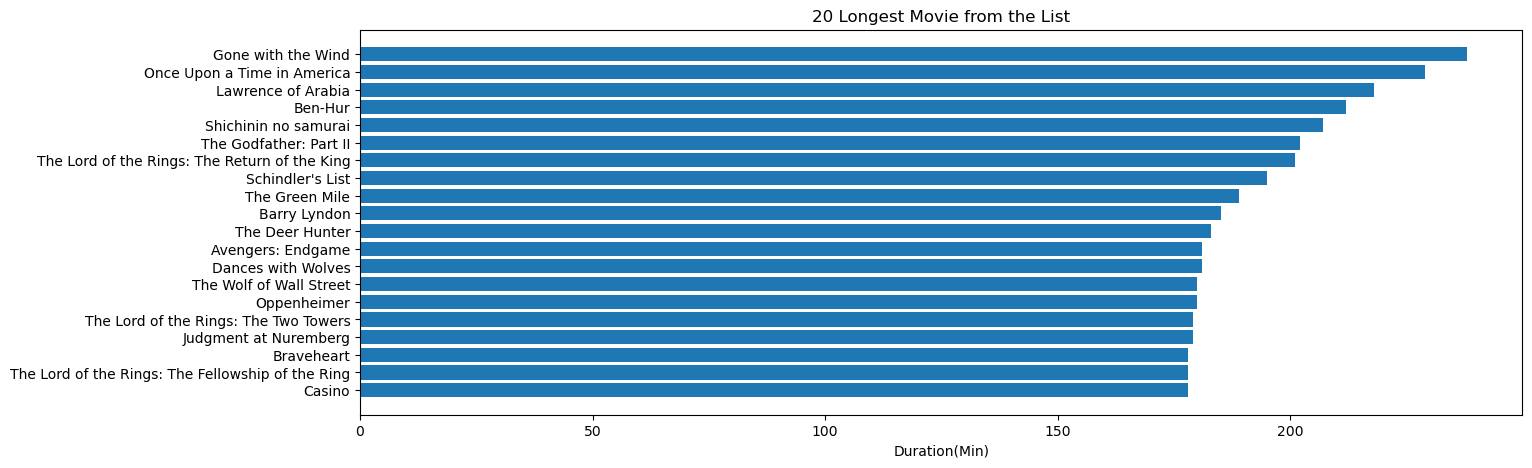

In [112]:
plt.figure(figsize=(15, 5))
plt.barh(y=df_longest_sorted['Title'], width=df_longest_sorted['Total Duration(Min)'])
plt.title('20 Longest Movie from the List')
plt.xlabel('Duration(Min)')
plt.show()

### Number of Movies Released per Year

In [80]:
df_count_year = df_IMDB_Top_250.groupby(['Year'])['Title'].count().reset_index()
df_count_year

,Year,Title
0,1921-01-01,1
1,1924-01-01,1
2,1925-01-01,1
3,1926-01-01,1
4,1927-01-01,1
...,...,...
82,2020-01-01,2
83,2021-01-01,2
84,2022-01-01,1
85,2023-01-01,4


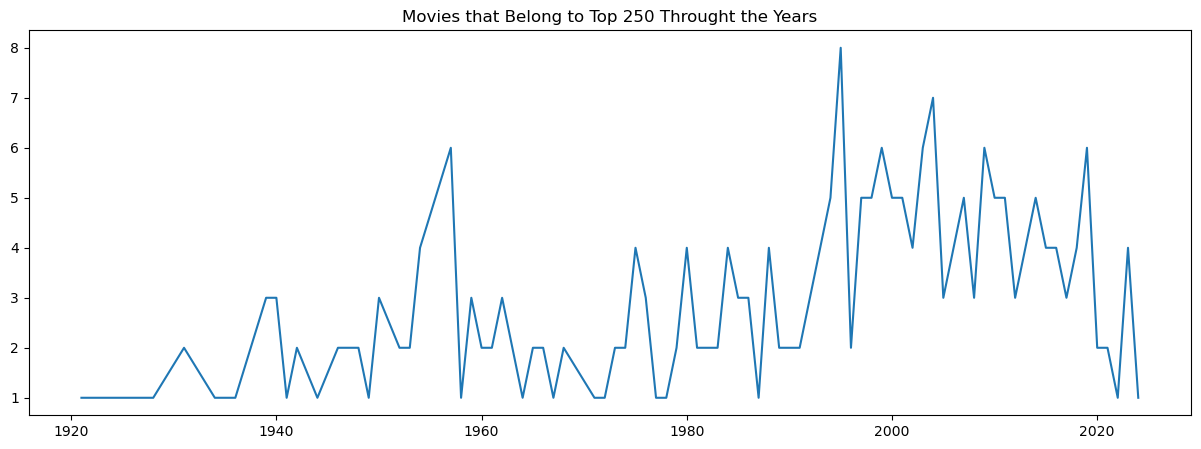

In [89]:
plt.figure(figsize=(15,5))
plt.plot(df_count_year['Year'], df_count_year['Title'])
plt.title('Movies that Belong to Top 250 Throught the Years')
plt.show()

### Number of Movies Per Rating

In [93]:
df_ratings_count = df_IMDB_Top_250.groupby(['Rating'])['Title'].count().reset_index()
df_ratings_count

,Rating,Title
0,13+,3
1,16+,2
2,7+,1
3,Approved,13
4,G,32
5,No Rating,2
6,Not Rated,15
7,PG,19
8,PG-13,59
9,Passed,5


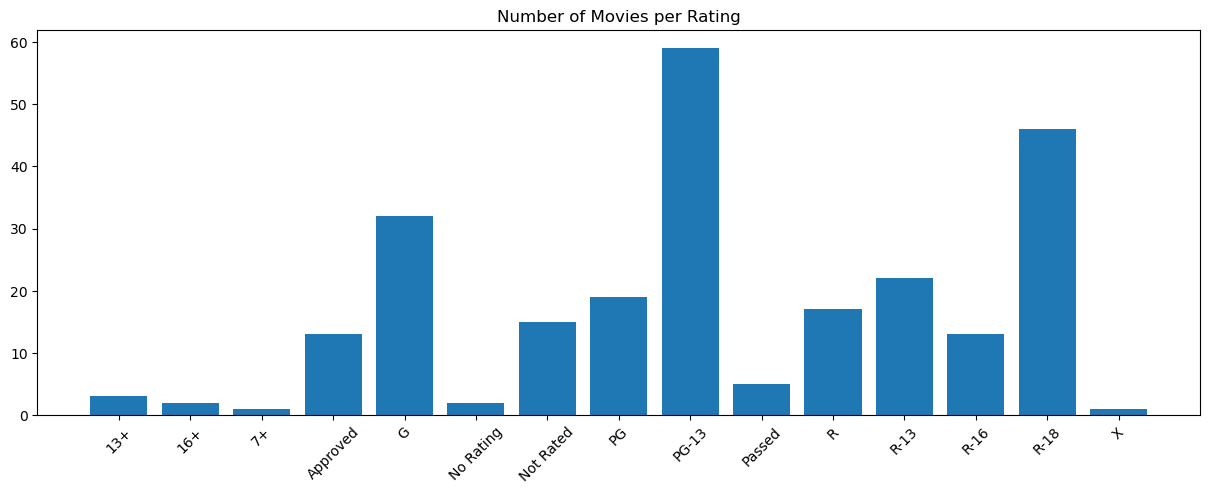

In [96]:
plt.figure(figsize=(15,5))
plt.bar(df_ratings_count['Rating'], df_ratings_count['Title'])
plt.title('Number of Movies per Rating')
plt.xticks(rotation=45)
plt.show()

### Most Rated Movie

In [114]:
df_most_rated = df_IMDB_Top_250.sort_values(by='Number of Raters(In Millions)').tail(20)
df_most_rated

,Rank,Title,Year,Duration(Hr),Duration(Min),Total Duration(Min),Rating,Score,Number of Raters,Number of Raters(In Millions)
29,30,Star Wars,1977-01-01,2.0,1,121.0,G,8.6,1.5M,1.5
130,131,The Wolf of Wall Street,2013-01-01,3.0,0,180.0,R-18,8.2,1.6M,1.6
36,37,Gladiator,2000-01-01,2.0,35,155.0,PG-13,8.5,1.6M,1.6
69,70,Inglourious Basterds,2009-01-01,2.0,33,153.0,R-18,8.4,1.6M,1.6
129,130,Batman Begins,2005-01-01,2.0,20,140.0,G,8.2,1.6M,1.6
54,55,Django Unchained,2012-01-01,2.0,45,165.0,R-16,8.5,1.7M,1.7
11,12,The Lord of the Rings: The Two Towers,2002-01-01,2.0,59,179.0,G,8.8,1.8M,1.8
18,19,Se7en,1995-01-01,2.0,7,127.0,R-18,8.6,1.8M,1.8
70,71,The Dark Knight Rises,2012-01-01,2.0,44,164.0,PG-13,8.4,1.8M,1.8
1,2,The Godfather,1972-01-01,2.0,55,175.0,R-18,9.2,2M,2.0


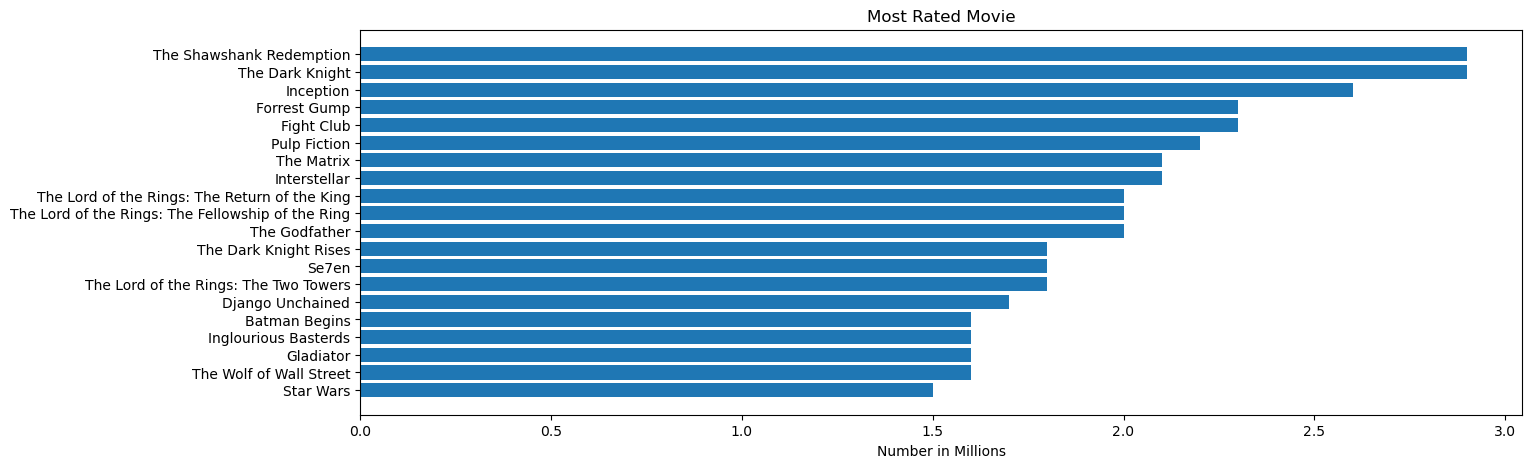

In [116]:
plt.figure(figsize=(15, 5))
plt.barh(y=df_most_rated['Title'], width=df_most_rated['Number of Raters(In Millions)'])
plt.title('Most Rated Movie')
plt.xlabel('Number in Millions')
plt.show()

## Exporting data

In [117]:
#export to csv
df_IMDB_Top_250.to_csv('IMDB_TOP_250_Movies_CLEANED.csv')